<div align="center"> <unsw-logo.png> </div>
<h1 style="text-align:center;"> A Data Science Approach to Forecast Electricity Consumption in Australia Incorporating ENSO Data</h1>

**Team:** 5

**Session:** Hexamester 5, 2024

**Course Code:** ZZSC9020

**Author(s):**
- Eugene Ho (z5497345) Data and Technical Specialist
- Majuwana Kariyawasam (z5398970) Data Specialist and AI Engineer
- Tariq Khan (z5414837) Data Specialist and ML Engineer
- Tom Woodley (z5450185) Group Leader

**Date:** 05/10/2024

**Acknowledgements:**
- By far the greatest thanks must go to my supervisor for the guidance, care and support they provided.
- Thanks to Emily, Michelle, John and Alex for proofreading the document in the final stages of preparation.
- Thanks to Robert Taggart for allowing his thesis style to be copied.


# Abstract
The image below gives you some hint about how to write a good abstract.
![Good Abstract](good-abstract.png)

# Introduction

Forecasting energy demand in the Australian market is crucial to maintaining a balanced and reliable electricity supply. With fluctuations in weather conditions and seasonal patterns, it is essential for energy producers and operators to predict demand accurately, allowing them to adjust outputs and bidding strategies effectively. The Australian Energy Market Operator (AEMO) plays a central role in producing forecasts over a variety of timescales, which help energy producers, grid operators, and businesses manage their operations to prevent both shortages and surpluses (Australian Energy Market Operator, 2022). These forecasts form the backbone of energy supply planning, and their accuracy directly impacts grid stability, pricing, and operational efficiency.

In Australia, weather conditions are a primary factor influencing energy demand. Temperature variations, in particular, are significant drivers. For example, during periods of extreme heat, there is a marked increase in electricity consumption due to higher usage of cooling systems such as air conditioners. Conversely, colder spells can lead to a surge in heating demand which affects electricity consumption. Anticipating demand on the monthly, and longer timescales is important for legacy (fossil fuel) producers of electricity as their agility to react to changes in demand is determined by usage in the order of the hourly scale and also by securing adequate fuel to produce the energy. 

AEMO closely monitors energy demand in response to unexpected events—referred to as "Shock Events"—which could be caused by sudden weather changes or infrastructure failures, further complicating the demand landscape (Australian Energy Market Operator, 2022). These shock events are commonly associated with extreme weather events on the climactic scale. One macro-driver of weather in the Pacific Ocean is the El Niño-Southern Oscillation (ENSO). ENSO is a climate phenomenon that affects weather patterns across Australia, with its two main phases—El Niño and La Niña—having a significant influence on rainfall, temperature, and extreme weather events. El Niño is typically associated with hotter and drier conditions in eastern Australia, while La Niña brings cooler, wetter conditions. These variations in climate have a direct effect on energy demand, especially in highly populated states like New South Wales (NSW), where electricity consumption is sensitive to seasonal weather fluctuations. As climate science advances, it is becoming increasingly possible to incorporate ENSO data into energy forecasting models. Given ENSO’s role in driving large-scale weather changes, its inclusion in energy demand models is justified, particularly in regions like NSW, where climate variability can have profound effects on electricity consumption.

This project investigates whether the integration of ENSO phases into weather and population data and then modeled using common meachine learning libraries can produce models that are competetive with AEMO's own projections. This focus is particularly relevant for legacy energy producers, who need to plan ahead for fuel procurement and production ramp-ups, as they cannot adjust output as quickly as renewable energy sources such as solar or wind. ENSO phases provide a valuable indicator of seasonal climate trends and their inclusion could improve the ability of models to predict medium-term energy demand. In this project, the forecasting time scale is set to monthly intervals, as this aligns with the operational requirements of legacy energy producers while the granularity of the data remains at an hourly level to capture variations in demand at the dispatch cycle level (each dispatch cycle is half-hourly so mean values are used to give hourly results).

Off-the-shelf machine learning models such as Linear Models (LMs), Extreme Gradient Boosting (XGBoost), Random Forest Regressors and Multilayer Perceptrons (MLPs) are used to assess whether the inclusion of ENSO phases enhances the predictive power of weather-based models when compared against the provided AEMO predictions. These machine learning models have proven effective in handling large and complex datasets, identifying patterns in data and capturing non-linear relationships, all of which are critical when forecasting energy demand in a highly dynamic environment like an electricity market operating on robust infrastructure. Linear Models, while not as accurate as more sophisticated machine learning models are commonly used for predictions as their simplicity and easy interpretabiliy is useful when engaging non-technical stakeholders. However, as the complexity of weather data and demand patterns increase, more advanced techniques such as XGBoost and Random Forest become essential due to their ability to capture intricate relationships between weather variables and demand and not be limited by the assumptions of linearity and independence. 

Incorporating ENSO phases as an additional predictor in these models represents a potential step forward in improving the accuracy of medium-term forecasts. The unique advantage of including ENSO lies in its ability to provide a longer-term view of climate patterns and the recent advent of reliable ENSO forecasting resulting in ENSO being useful as an explanatory variable in predictions. ENSO offers a broad seasonal perspective on climate which in turn allows for models that predict energy demand through secondary effects like temperature, wind and rainfall to improve accuracy. As an example: during an El Niño phase, energy producers in New South Wales might anticipate higher-than-average electricity demand due to prolonged periods of heat. ENSO also operates in a neutral phase or La Niña phase which drives lower temperatures and wetter conditions.

The choice of NSW as the focus for this study is strategic as it is on the Pacific coast meaning the assumption of it being affected by ENSO is most likely to be valid and that New South Wales is also home to one half of the total population of Australia. New South Wales therefore, represents a substantial portion of Australia's energy consumption, making it an ideal case study for examining the impact of ENSO on electricity demand.

Ultimately, this report aims to evaluate the effectiveness of incorporating a significant climate driver into a weather and population based energy demand model to determine whether or not it can improve the accuracy of monthly forecasts. The results will be evaluated agains the AEMO forecasts to determine if the models are competitive with the industry standard. The AEMO forecasts are likewise evaluated but calculating the root mean square error between its predictions and the actual demand over the period investigated.


-- need to add references for the unsubstantiated claims in the introduction

# Literature Review
In recent years, numerous studies have explored the relationship between weather conditions and energy demand. For instance, studies have shown that temperature is a key driver of energy consumption, particularly in regions with extreme climates like NSW. Research has also highlighted the importance of accounting for seasonal variations and extraordinary events in demand forecasting models.

Many models rely on general linear models (GLMs) (Fan, MacGill and Sproul, 2017; Leung, 2022; Porteiro, Hernández-Callejo and Nesmachnow, 2022) which, while accurate, often struggle with higher-level interactions and non-linear effects. These are useful because of their simplicity and ease of communication to non-technical stakeholders. They are additionally, not time or resource-intensive and can be trained and deployed easily (Nooruldeen et al., 2023). Many such models, of which ARIMA (Fattah et al., 2018) and its derivatives: ARIMAX and SARIMA are some of the most widely used because they have the advantage over other linear models of being able to deal with seasonal effects. Unfortunately, the timescales over which these types of seasonal fluctuations act (daily and yearly) are not relevant to this investigation where there is a focus on monthly forecasts.
Machine learning models like Random Forest (Bedi and Toshniwal, 2019; Vijendar Reddy et al., 2023) which is an ensemble method address non-linearities and seasonal influences effectively. More complex models such as Convolutional Neural Networks (Koprinska, Wu and Wang, 2018) and XGBoost (Vijendar Reddy et al., 2023) have also been successful, handling seasonality, trends, and non-linearities well. However, none of these studies integrate macro-seasonal factors like ENSO, presenting a gap in current models.
The state-of-the-art is to use a hybrid model approach which blends two models or uses the output of one to feed into the other to produce accurate forecasts (Fan and Hyndman, 2010; Vu, Muttaqi and Agalgaonkar, 2015; Chreng, Lee and Tuy, 2022). This approach is 
This work expands on previous research by incorporating ENSO projections and population growth into models. Linear models and advanced machine learning techniques will be used to address this knowledge gap.



--need 800 words here

# Material and Methods
## Software

The core platform of this project was Python. Python libraries for machine learning are intuitive and user-friendly which allows for easy collaboration. Typesetting and presentation in Jupyter Notebooks were equally user-friendly and can be used to present final results to stakeholders as well as construct code that can be communicated between team members. The following libraries were used in this project:
- Pandas: Data manipulation and analysis
- NumPy: Mathematical functions
- Scikit-learn: Machine learning library
- XGBoost: Gradient boosting library
- Random Forest: Ensemble learning library
- PyTorch: Machine learning library
- Matplotlib: Data visualization
- Seaborn: Data visualization
- OTHERS...

Each of the above listed libraries' use were justified in the literature review where necessary.

For the non-technical side of the project:
- Discord was used for instant messaging due to its easy integration with mobile and computing platforms.
- Microsoft Teams was used for video conferencing and file sharing as well as meeting with supervisors.
- Github was used for version control and collaboration on code.
- Microsoft Planner was used for task management and tracking.
- Microoft PowerPoint and OBS Studio were used for the final presentation and for recording the presentation.

-- should I add more here?

## Description of the Data
How are the data stored? What are the sizes of the data files? How many files?

Historical electricity usage data of different regions were provided by course staff. The data was processed and validated against the corresponding data collected from BoM for the same period in the Sydney South-West region. Where the data was collected in text or Excel formats, they were converted to CSV and stored on the Gihub repository. The data was cleaned and preprocessed before being used in the models. The final dataset contains only columns used for the machine learning models. It will be presented in the Exploratory Data Analysis section that different metrics for measuring the ENSO cycle were considered. Ultimately, the raw surface temperature and dea pressure differential data produced the best results.

Once the provided weather data was validated for consistency with the historical weather data that includes temperature, precipitation and humidity from BoM, superfluous data were dropped 

The data validation process mentioned in the above paragraph consisted of overlaying the provided temperature data with the collected data. Not only were the data observed to fall within the same range over the investigated domain but also trends and patterns were observed to be consistent. To quantify this, the root mean square error (RMSE) between the two datasets was calculated and found to be small (quantity).

Population growth data from New South Wales (produced by the Australian Buraeu of Statistics) was also collected and used in the models. Additionally, population forecasts until 2070 were obtained from the Australian Bureau of Statistics (ABS) and used to forecast energy demand in the future.

ENSO cycle data: Southern Oscillation Index (SOI) and Sea Surface Temperature (SST) were sourced from BoM. BoM also publishes their own ENSO classifications and both SOI and SST were processed to produce ENSO classifications. The ENSO classifications were used in untuned models to determine their impact on model performance. It was determined (as is presented in the Exploratory Data Analysis) that the raw SOI and SST data produced the best results.

All data can be found in the Github repository under the data folder.

## Data Cleaning
How did you deal with missing data?

-- extrapolate to 200 words

## Exploratory Data Analysis
Here we explore the data using histograms, scatter plots, and numerical summaries.

In [5]:
#setting up the environment

#install the required packages if they are not already installed
%pip install pandas matplotlib numpy scikit-learn seaborn statsmodels > dev null

Note: you may need to restart the kernel to use updated packages.


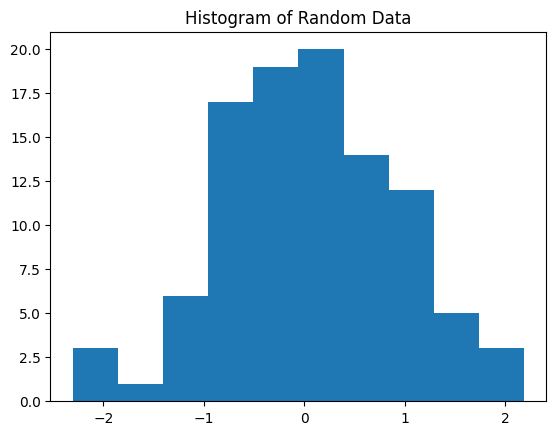

In [1]:
# Example in Python
import numpy as np
import matplotlib.pyplot as plt

# Generating some random data
np.random.seed(1)
data = np.random.normal(0.0, 1.0, size=100)

# Plotting a histogram
plt.hist(data, bins=10)
plt.title('Histogram of Random Data')
plt.show()

# Analysis and Results
### A First Model
Linear regression model: 
$$ Y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \epsilon_i $$

# Discussion
Put the results in perspective with respect to the problem studied.

## Machine Learning Models

# Conclusion and Further Issues
What are the main conclusions? What recommendations can you make? What further analysis could be done?

![University Logo](unsw-logo.png)

# References

Australian Energy Market Operator (2022) Forecasting Approach-Electricity Demand Forecasting Methodology.
Bedi, J. and Toshniwal, D. (2019) ‘Deep learning framework to forecast electricity demand’, Applied Energy, 238, pp. 1312–1326. Available at: https://doi.org/10.1016/j.apenergy.2019.01.113.

Chreng, K., Lee, H.S. and Tuy, S. (2022) ‘A Hybrid Model for Electricity Demand Forecast Using Improved Ensemble Empirical Mode Decomposition and Recurrent Neural Networks with ERA5 Climate Variables’, Energies, 15(19). Available at: https://doi.org/10.3390/en15197434.

Fan, H., MacGill, I.F. and Sproul, A.B. (2017) ‘Statistical analysis of drivers of residential peak electricity demand’, Energy and Buildings, 141, pp. 205–217. Available at: https://doi.org/10.1016/j.enbuild.2017.02.030.

Fan, S. and Hyndman, R.J. (2010) ‘Short-term load forecasting based on a semi-parametric additive model’, IEEE Transactions on Power Systems. Melbourne. Available at: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://robjhyndman.com/papers/2010STLF-FinalR1.pdf (Accessed: 17 September 2024).

Fattah, J. et al. (2018) ‘Forecasting of demand using ARIMA model’, International Journal of Engineering Business Management, 10. Available at: https://doi.org/10.1177/1847979018808673.

Koprinska, I., Wu, D. and Wang, Z. (2018) ‘Convolutional Neural Networks for Energy Time Series Forecasting’, in 2018 International Joint Conference on Neural Networks (IJCNN). IEEE, pp. 1–8. Available at: https://doi.org/10.1109/IJCNN.2018.8489399.

Leung, A. (2022) ‘A Multivariate Model for Electricity Demand using Facebook Prophet’, TowardsDataScience [Preprint].

Nooruldeen, O. et al. (2023) ‘Strategies for predictive power: Machine learning models in city-scale load forecasting’, e-Prime - Advances in Electrical Engineering, Electronics and Energy, 6. Available at: https://doi.org/10.1016/j.prime.2023.100392.

Porteiro, R., Hernández-Callejo, L. and Nesmachnow, S. (2022) ‘Electricity demand forecasting in industrial and residential facilities using ensemble machine learning’, Revista Facultad de Ingeniería, Universidad de Antioquia [Preprint]. Available at: https://doi.org/https://www.doi. org/10.17533/udea. redin.20200584.

Vijendar Reddy, G. et al. (2023) ‘Electricity Consumption Prediction Using Machine Learning’, in E3S Web of Conferences. EDP Sciences. Available at: https://doi.org/10.1051/e3sconf/202339101048.

Vu, D.H., Muttaqi, K.M. and Agalgaonkar, A.P. (2015) ‘A variance inflation factor and backward elimination based robust regression model for forecasting monthly electricity demand using climatic variables’, Applied Energy, 140, pp. 385–394. Available at: https://doi.org/10.1016/j.apenergy.2014.12.011.
 


# Appendix
## **Codes**
Add your code snippets here.